# Part 1b: Experimental Phase using Basic Linear Regression & Rolling Mean

This code demonstrates how to view time series data with pandas and various methods of sampling, smoothing (rolling mean), and applying linear regression to the data. 



<h3 align='Left'> Importing Libraries</h3>

In [72]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use('seaborn')
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [73]:
dataset_data= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
dataset = dataset_data.copy()
dataset = dataset.fillna(method='ffill')
dataset.head()

,Date,Price,Open,High,Low,Change %
0,"Jul 31, 2020",1.3090,1.3098,1.3171,1.3069,-0.04%
1,"Jul 30, 2020",1.3095,1.2997,1.3103,1.2944,0.76%
2,"Jul 29, 2020",1.2996,1.2932,1.3013,1.2911,0.49%
3,"Jul 28, 2020",1.2932,1.2882,1.2953,1.2838,0.38%
4,"Jul 27, 2020",1.2882,1.2786,1.2903,1.2780,0.72%


<h3 align='Left'> Adding Column </h3>

In [74]:
dataset['Ticks'] = range(0,len(dataset.index.values))

In [75]:
dataset.head()

,Date,Price,Open,High,Low,Change %,Ticks
0,"Jul 31, 2020",1.3090,1.3098,1.3171,1.3069,-0.04%,0
1,"Jul 30, 2020",1.3095,1.2997,1.3103,1.2944,0.76%,1
2,"Jul 29, 2020",1.2996,1.2932,1.3013,1.2911,0.49%,2
3,"Jul 28, 2020",1.2932,1.2882,1.2953,1.2838,0.38%,3
4,"Jul 27, 2020",1.2882,1.2786,1.2903,1.2780,0.72%,4


In [76]:
dataset.shape

(214, 7)

<h3 align='Left'> Plotting Ticks vs Spot Price</h3>

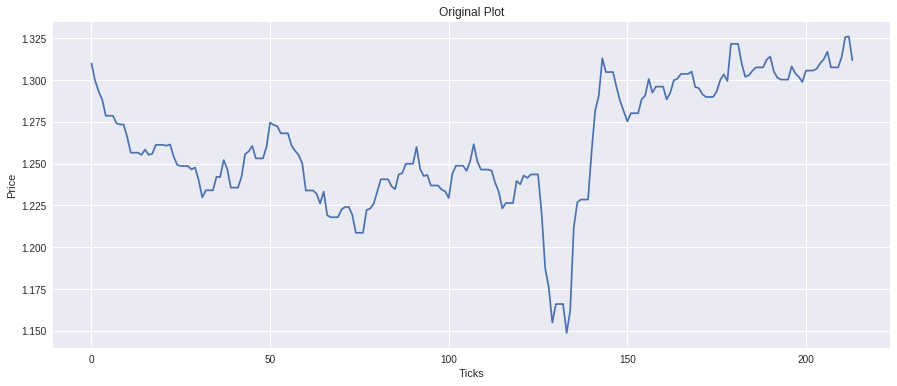

In [77]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data = dataset);

<h3 align='Left'> Sampling 1/10th of the Data</h3>

In [78]:
one_tenth = dataset.sample(frac = .1, random_state=np.random.randint(10))

In [79]:
one_tenth.head()

,Date,Price,Open,High,Low,Change %,Ticks
197,"Jan 16, 2020",1.3079,1.3040,1.3085,1.3026,0.31%,197
37,"Jun 24, 2020",1.2420,1.2521,1.2543,1.2414,-0.79%,37
89,"May 03, 2020",1.2444,1.2499,1.2504,1.2405,-0.48%,89
176,"Feb 06, 2020",1.2930,1.2999,1.3005,1.2921,-0.55%,176
170,"Feb 12, 2020",1.2961,1.2951,1.2992,1.2946,0.06%,170


<h3 align='Left'>Reordering Data by Ticks Value</h3>

In [80]:
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Date,Price,Open,High,Low,Change %,Ticks
5,"Jul 26, 2020",1.2882,1.2786,1.2903,1.2780,0.72%,5
12,"Jul 19, 2020",1.2662,1.2565,1.2666,1.2517,0.75%,12
37,"Jun 24, 2020",1.2420,1.2521,1.2543,1.2414,-0.79%,37
55,"Jun 06, 2020",1.2723,1.2681,1.2737,1.2628,0.46%,55
74,"May 18, 2020",1.2193,1.2086,1.2228,1.2075,0.72%,74


<h3 align='Left'> Plotting Ticks vs Open Price on Sampled Data</h3>

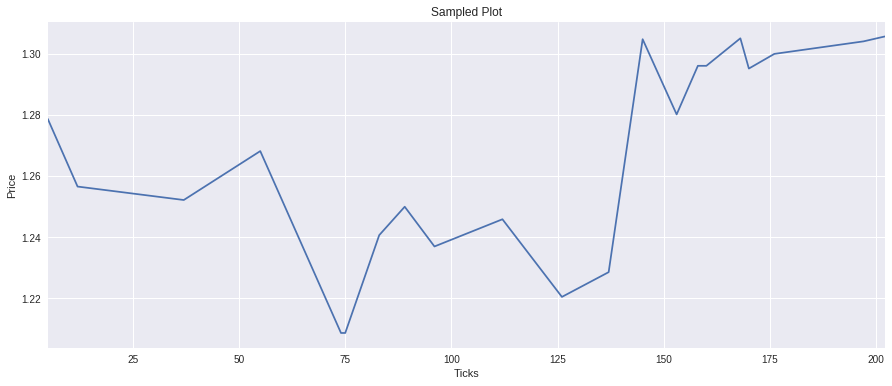

In [81]:
axes = one_tenth.plot('Ticks', 'Open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

<h3 align='Left'> Plotting Original Data vs Sampled Data (Subplot)</h3>

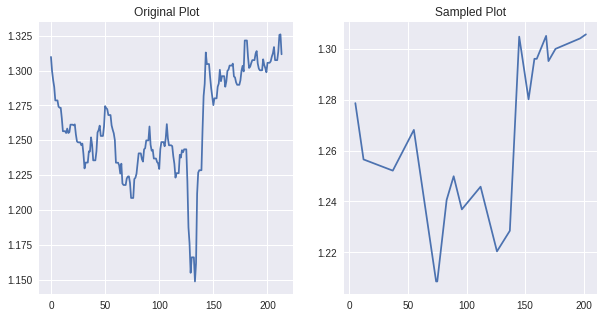

In [82]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = dataset);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');

<h3 align='Left'> Change the Index From Date to Ticks</h3>

In [83]:
#google.index = google['Ticks']
# Removing Index
dataset = dataset.reset_index()
dataset.head(3)

,index,Date,Price,Open,High,Low,Change %,Ticks
0,0,"Jul 31, 2020",1.3090,1.3098,1.3171,1.3069,-0.04%,0
1,1,"Jul 30, 2020",1.3095,1.2997,1.3103,1.2944,0.76%,1
2,2,"Jul 29, 2020",1.2996,1.2932,1.3013,1.2911,0.49%,2


<h3 align='Left'> Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)</h3>

In [84]:
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
dataset['Rolling_Mean'] = dataset['Price'].rolling(window = 80).mean()
dataset.head(5)

,index,Date,Price,Open,High,Low,Change %,Ticks,Rolling_Mean
0,0,"Jul 31, 2020",1.3090,1.3098,1.3171,1.3069,-0.04%,0,NaN
1,1,"Jul 30, 2020",1.3095,1.2997,1.3103,1.2944,0.76%,1,NaN
2,2,"Jul 29, 2020",1.2996,1.2932,1.3013,1.2911,0.49%,2,NaN
3,3,"Jul 28, 2020",1.2932,1.2882,1.2953,1.2838,0.38%,3,NaN
4,4,"Jul 27, 2020",1.2882,1.2786,1.2903,1.2780,0.72%,4,NaN


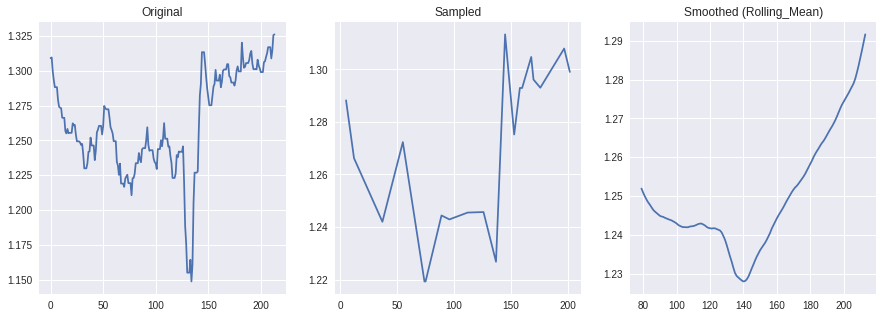

In [85]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Ticks', 'Price', data = dataset);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Price', data = one_tenth);
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling_Mean', data = dataset);
axes[2].set_title('Smoothed (Rolling_Mean)');

<h3 align='Left'>Plotting Original Data and Smoothed Data on Same Plot</h3>

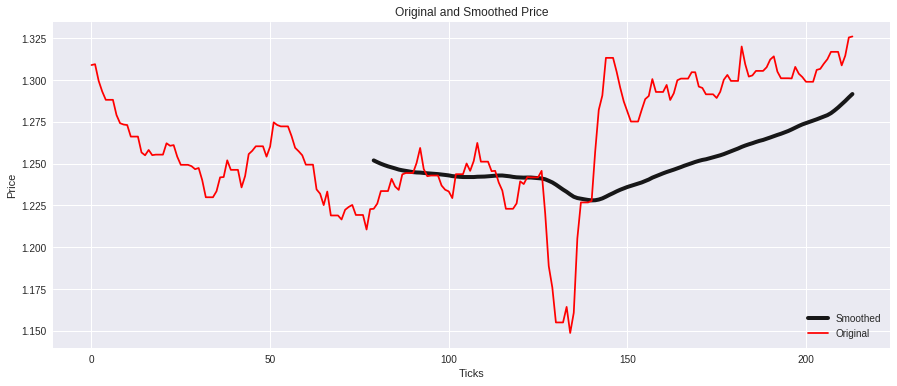

In [86]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(dataset['Ticks'], dataset['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
plt_one.plot(dataset['Ticks'], dataset['Price'], color = (1,0,0), label = 'Original');
plt_one.set_title('Original and Smoothed Price')
plt_one.set_xlabel('Ticks')
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

<h3 align='Left'>Plotting Original Data and Smoothed Data on Same Plot, but with Date as x axis</h3>

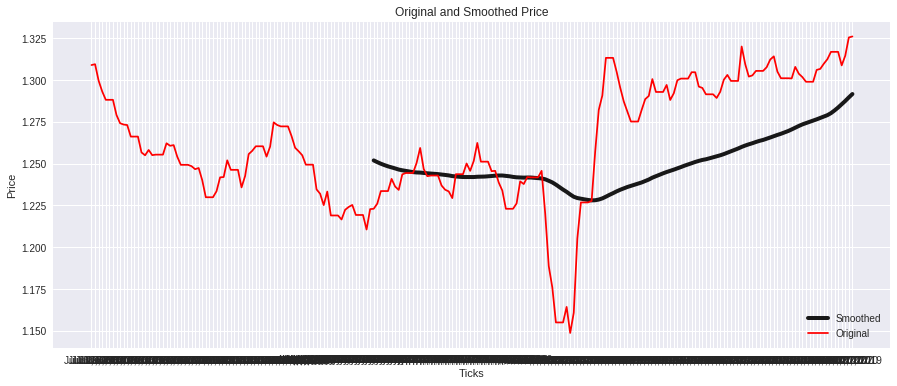

In [87]:
# Almost exactly the code as above but with datetime
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(dataset['Date'], dataset['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
plt_one.plot(dataset['Date'], dataset['Price'], color = (1,0,0), label = 'Original');
plt_one.set_title('Original and Smoothed Price')
plt_one.set_xlabel('Ticks')
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

In [88]:
# Plotting Date works best with datetime as the type. 
type(dataset['Date'].values[0])

str

<h3 align='Left'>Getting Data Only from Tick 50 to 200</h3>

In [89]:
filt_dataset = dataset[(dataset['Ticks'] >= 100) & (dataset['Ticks'] <= 214)]

In [90]:
filt_dataset.head()

,index,Date,Price,Open,High,Low,Change %,Ticks,Rolling_Mean
100,100,"Apr 22, 2020",1.2334,1.2294,1.2387,1.2273,0.32%,100,1.242974
101,101,"Apr 21, 2020",1.2294,1.2437,1.2451,1.2247,-1.15%,101,1.242564
102,102,"Apr 20, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,102,1.242351
103,103,"Apr 19, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,103,1.242134
104,104,"Apr 18, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,104,1.242003


<h3 align='Left'>Linear Regression</h3>

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression().fit(filt_dataset[['Ticks']], filt_dataset[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
# Equation of the line
print 'y = ', round(m[0],2), 'x + ', round(b[0],2)

y =  0.0 x +  1.19


In [93]:
# Using the equation of the line to get y values
predictions = model.predict(filt_dataset[['Ticks']])
predictions[0:5]

array([[1.2274651 ],
       [1.22787119],
       [1.22827727],
       [1.22868336],
       [1.22908945]])

In [94]:
# making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = filt_dataset.index.values, columns = ['Pred'])
predictions.head()

,Pred
100,1.227465
101,1.227871
102,1.228277
103,1.228683
104,1.229089


<h3 align='Left'>Joining the Two DataFrames</h3>

In [95]:
# join and concat documentation
# http://pandas.pydata.org/pandas-docs/stable/merging.html

joined_df = filt_dataset.join(predictions, how = 'inner')
joined_df.head()

,index,Date,Price,Open,High,Low,Change %,Ticks,Rolling_Mean,Pred
100,100,"Apr 22, 2020",1.2334,1.2294,1.2387,1.2273,0.32%,100,1.242974,1.227465
101,101,"Apr 21, 2020",1.2294,1.2437,1.2451,1.2247,-1.15%,101,1.242564,1.227871
102,102,"Apr 20, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,102,1.242351,1.228277
103,103,"Apr 19, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,103,1.242134,1.228683
104,104,"Apr 18, 2020",1.2437,1.2487,1.2505,1.2415,-0.51%,104,1.242003,1.229089


<h3 align='Left'>Plotting the Values Based on the Equation vs the Rolling Mean</h3>

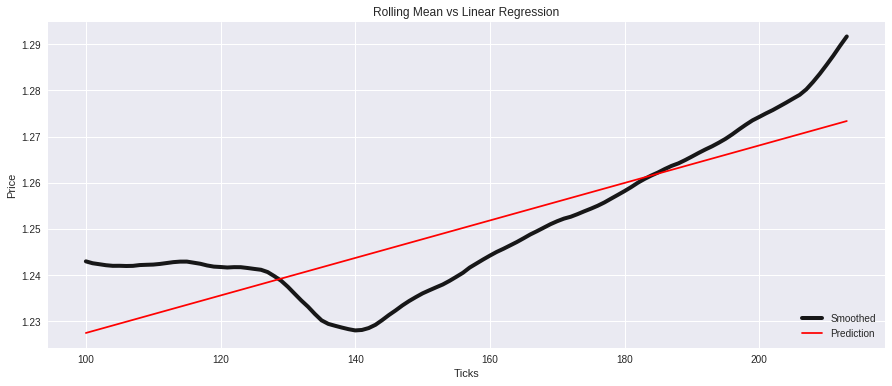

In [96]:
fig = plt.figure();
plt_one = fig.add_subplot(111);
plt_one.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
plt_one.plot(joined_df['Ticks'], joined_df['Pred'], color = (1,0,0), label = 'Prediction');
plt_one.set_title('Rolling Mean vs Linear Regression')
plt_one.set_xlabel('Ticks')
plt_one.set_ylabel('Price')
plt_one.legend(loc='lower right');

In [97]:
# documentation 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html+
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.6848460381288657

# Conclusions moving forward:

